# Beyond Clustering 101: leaving Scikit Learn (just a little) behind 🌌

Hey! how are you?

I'm going to assume that you've already ran some succesfull clustering over some toy or real datasets with Scikit Learn. You've had your fair share of reading, coding and learning and you're ready to peak outside so to speak. Well, you've arrived to the right place! This a small notebook to showcase some seriously awesome libraries and take advantange of Deepnote' features.

The main idea is to roll with the flow of a clustering process and add incremental complexity without getting lost in the way. We're going to cover these topics:

1. Metrics and Graphics standarization with __Scikit Plot__
2. Dimensionality reduction with __UMap__
3. Interpretation of clusters with __Skope Rules__
4. For times when the dataset keeps growing and your resources stay the same you call __Faiss__
5. Demo-ing a webpage (so to speak..you'll see!) with __Flask__ directly from Deepnote

As a bonus for enduring the trip you'll get a flashy and from now on, indispensable, tool to _draw data_ 🤯, a link to the github repo and a dockefile to install and run Faiss-CPU in Deepnote.

Let's start!

## 1. Metrics and Graphics standarization with Scikit Plot

First of all, you can Pip install every library from a cell, many cells, open a terminal or be smart and hide everything in the init file as Deepnote suggest 😉.

![alt text](/pics/requirements.gif)

### 1st Bonus: Drawing data!

This is an awesome library, I first tried the web [calmcode.io](https://calmcode.io/labs/drawdata.html) and It's awesome. Just check all you can draw and use. Tiny detail, the copy-paste doesn't work for me using `pd.read_clipboard()`so I've just created a new file named _data.csv_, pasted the data in it and continued 

![alt text](/pics/scatterdraw.gif)

In [ ]:
from drawdata import draw_scatter
draw_scatter()

In [ ]:
# Now we import all else that matters for this section
import pandas as pd # Old friend 🐼
import matplotlib.pyplot as plt # Experienced graph friend 📊
import seaborn as sns # New colourfull artist 👩‍🎨
from sklearn.cluster import KMeans # We are here for this guy 👏

import scikitplot as skplt # New guy in town, It's our first library!

drawn_data = pd.read_csv('data.csv')

Check the _chart_ option to quickly evaluate a dataset, It's seriously cool!!

alt.Chart(...)

#### Let's get into business with our first graph
Perhaps you're the organized and responsible person that remember the elbow method plot code, but sadly for me, I'm not wired this way. I googled every single time for the code until I stumbled with [Scikit-plot](https://scikit-plot.readthedocs.io/en/stable/index.html), an awesome library to get quick and complete plots of metrics, models and byproducts of algorithms.

We're going to try just two plots (__elbow method__ and __Silhouette score__), but seriously check it out, you'll get standarized plots and save time to focus on what matters instead of tweaking the plots arguments to show you something compelling.

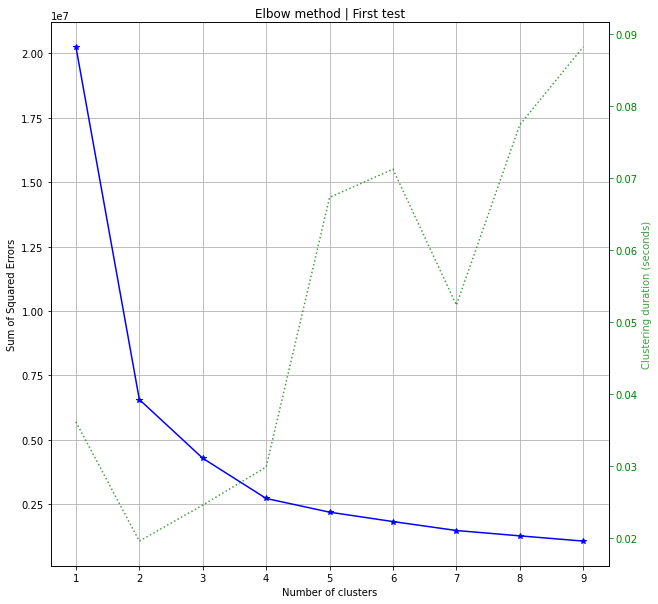

In [ ]:
# Just instancing a Kmeans, defining X and choose some range of k will suffice to get a nice graph but you can improve it adding the time of execution, how neat is that?
kmeans = KMeans(random_state=42)

skplt.cluster.plot_elbow_curve(kmeans,
                                X = drawn_data[['x', 'y']], # Remember that we only need these two columns, the other is the class we've just drawn
                                title = 'Elbow method | First test',
                                cluster_ranges=range(1, 10), # Do not overthink, just try!
                                show_cluster_time=True, # First cool feature, you get the execution time
                                figsize=(10,10))
plt.show()


In [ ]:
# Now we cluster as usual, I've choose 4 just for fun sake, for what we've draw there's no possibility of learning the "D" cluster(the one sprayed all over the canvas)
cool_kmeans = KMeans(4, random_state=42)

cool_kmeans.fit(drawn_data[['x', 'y']])

KMeans(n_clusters=4, random_state=42)

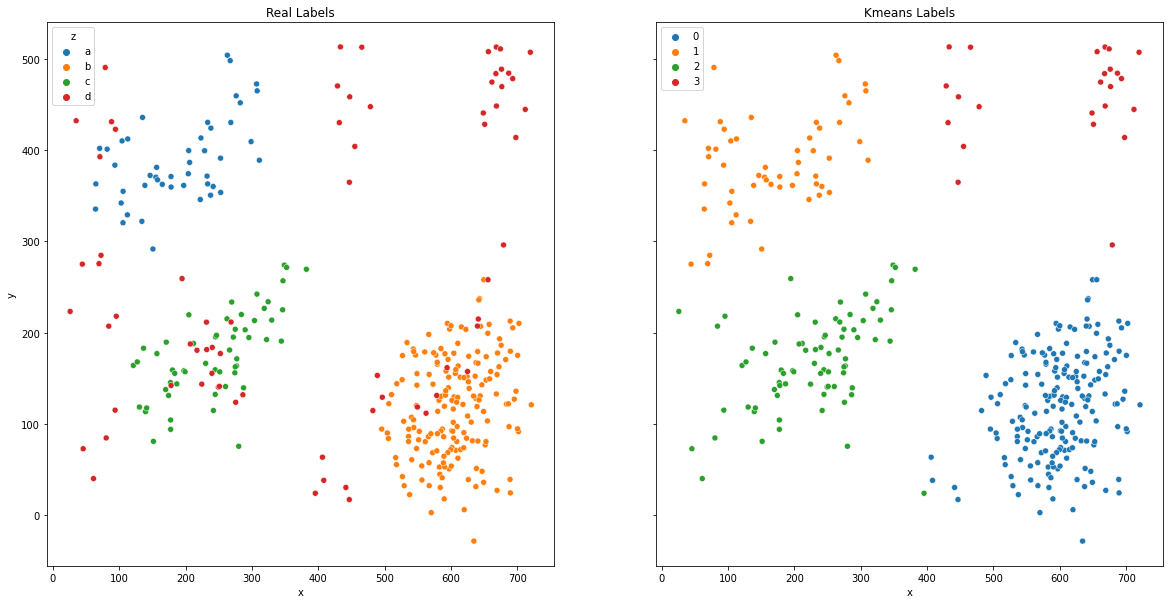

In [ ]:
# Here we look at a side by side comparison of the real labels and the result. As expected, Kmeans fail with the chaotic cluster.
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20,10))

sns.scatterplot(data=drawn_data, x='x', y='y', hue="z", ax=ax1, palette='tab10').set_title('Real Labels')

sns.scatterplot(data=drawn_data, x='x', y='y', hue=cool_kmeans.labels_, ax=ax2, palette='tab10').set_title('Kmeans Labels')

fig.show()

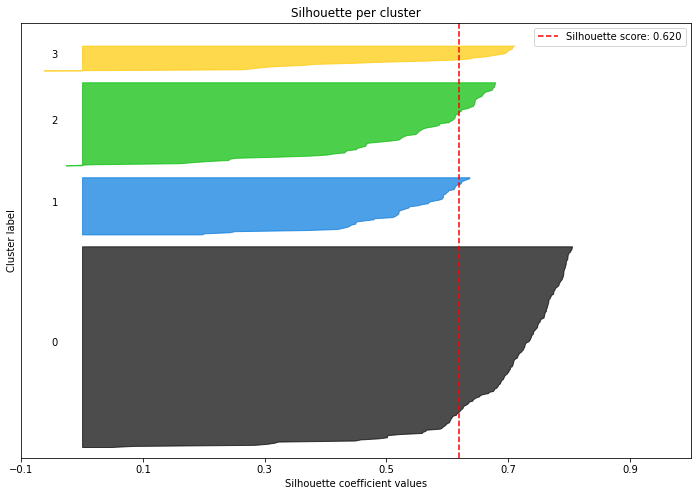

In [ ]:
# Back with our library we easily check silhouette score
skplt.metrics.plot_silhouette(drawn_data[["x", "y"]],
                                cool_kmeans.labels_,
                                title='Silhouette per cluster',
                                figsize=(12,8))
plt.show()

#### Conclusions:
0. The draw data It's increible simple and yet amazing. Even if you don't use it for machine learning (thing you could do to test algorithms over the same dataset!) It's great for __trying visualizations or learn metrics/statistics__ in a visual way in python or using via web in any BI tool.
1. Standarize plots might not look like the most urgent thing to do yet there's a good chance of __saving time__ (that's allways critical)
2. The high level API It's cool to let new learners __focus on relevant things__ like understanding algorithms or metrics.

## 2. Dimensionality reduction with UMap

Perhaps you have a dataset with real and categorical features or just many numeric features and you keep getting some awful clusters. You know that you should apply a dimensionality reduction technique and look in the Sklearn toolbox to find PCA or SVD, but you prefer to go rogue and look beyond.

That's when Umap apears. an awesome technique suitable for small datasets (in my experience is better with less than 100.000 instances) because the time it takes to compute. To deeply undertands it and learns how It compares to other techniques check the [umap docs.](https://umap-learn.readthedocs.io/en/latest/index.html)


Now we're gonna use a very raw dataset, meaning that there's no feature engineering neither intelligence preprocessing, just scalling, Umap and check metrics to compare the original vs embeded results 👩‍🔬

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import umap

In [ ]:
# We're reading it from an online source and then show the data for you to explore It.
AI = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/adult-all.csv')
AI

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48837,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [ ]:
# Awfull preprocessing example, just trust the process!
AI_dummified = pd.get_dummies(AI)
AI_dummified # Now we have a 110 features dataset vs an original total of 15 features, pretty wild!

,39,77516,13,2174,0,40,State-gov_?,State-gov_Federal-gov,State-gov_Local-gov,State-gov_Never-worked,...,United-States_Scotland,United-States_South,United-States_Taiwan,United-States_Thailand,United-States_Trinadad&Tobago,United-States_United-States,United-States_Vietnam,United-States_Yugoslavia,<=50K_<=50K,<=50K_>50K
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,215419,13,0,0,36,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
48837,64,321403,9,0,0,40,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
48838,38,374983,13,0,0,50,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
48839,44,83891,13,5455,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
# Now some scalling
scaled_AI_dummified = StandardScaler().fit_transform(AI_dummified)

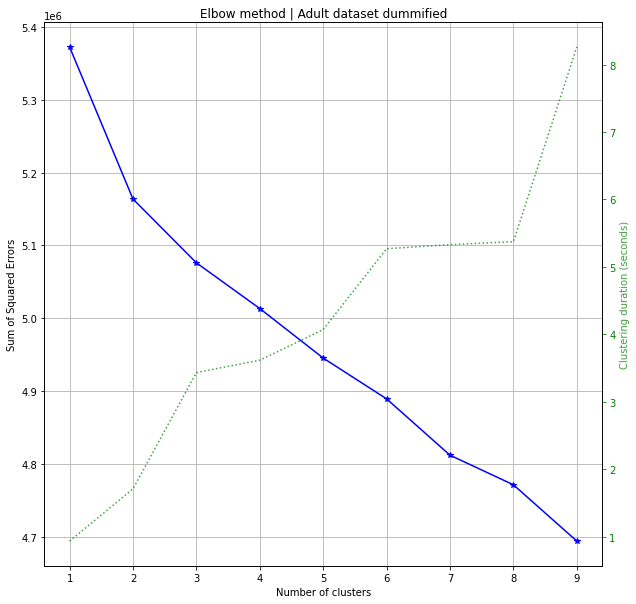

In [ ]:
# Truth time!
kmeans = KMeans(random_state=42)
skplt.cluster.plot_elbow_curve(kmeans,
                                X = scaled_AI_dummified,
                                title='Elbow method | Adult dataset dummified',
                                cluster_ranges=range(1, 10),
                                show_cluster_time=True,
                                figsize=(10,10))
plt.show()

Now we're going to make Umap work on the scaled dataset, run elbow method and then compare results

In [ ]:
# You can check the docs for proper use, but a vanilla one might be usefull to understand the impact and make a first impression
reducer = umap.UMAP() # Instanciate vainilla Umap
embedding = reducer.fit_transform(scaled_AI_dummified) # make the transformation
print(embedding) # Check that we get an array of two features

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
[[  5.0279236  14.809678 ]
 [  2.8079588 -11.938696 ]
 [  9.510496   11.114416 ]
 ...
 [ 13.073996   -1.911268 ]
 [  2.280577    3.7408798]
 [ -1.0213417   4.686391 ]]


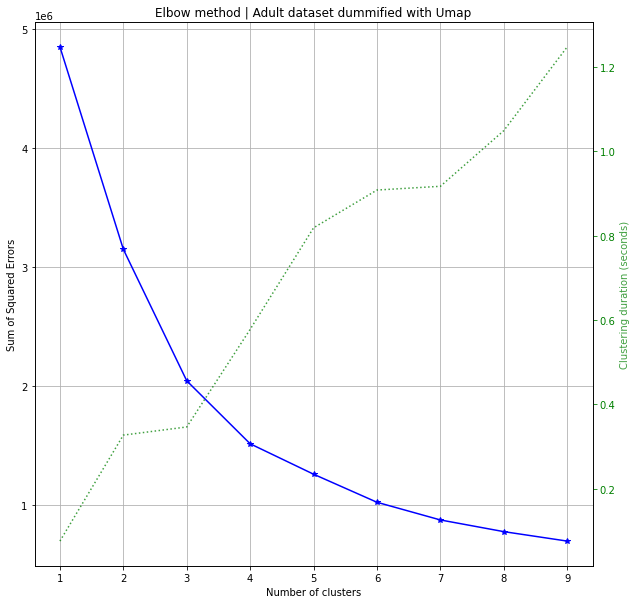

In [ ]:
# Back with 
kmeans_umap = KMeans(random_state=42)
skplt.cluster.plot_elbow_curve(kmeans_umap,
                                X = embedding,
                                title='Elbow method | Adult dataset dummified with Umap',
                                cluster_ranges=range(1, 10),
                                show_cluster_time=True,
                                figsize= (10, 10))
plt.show()

On plain sight we can see that the SSE has nicely droped, good start!

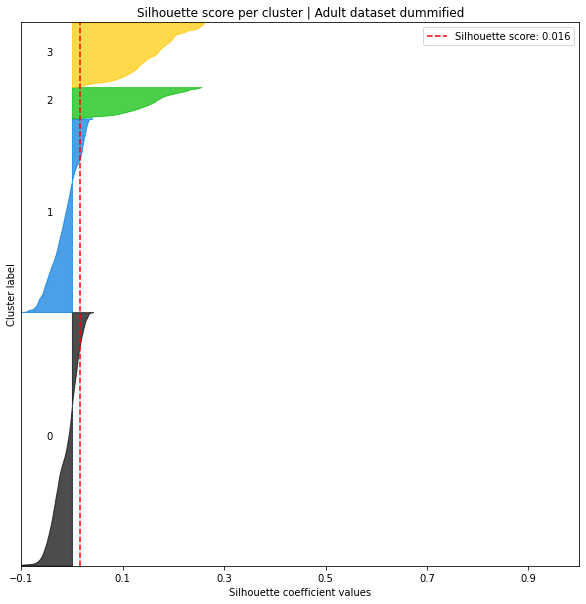

In [ ]:
# We're going to try to get our 4 clusters
kmeans_adult = KMeans(n_clusters=4, random_state=42)

kmeans_adult.fit(scaled_AI_dummified)

skplt.metrics.plot_silhouette(scaled_AI_dummified,
                                kmeans_adult.labels_,
                                title='Silhouette score per cluster | Adult dataset dummified',
                                figsize=(12,8))
plt.show()

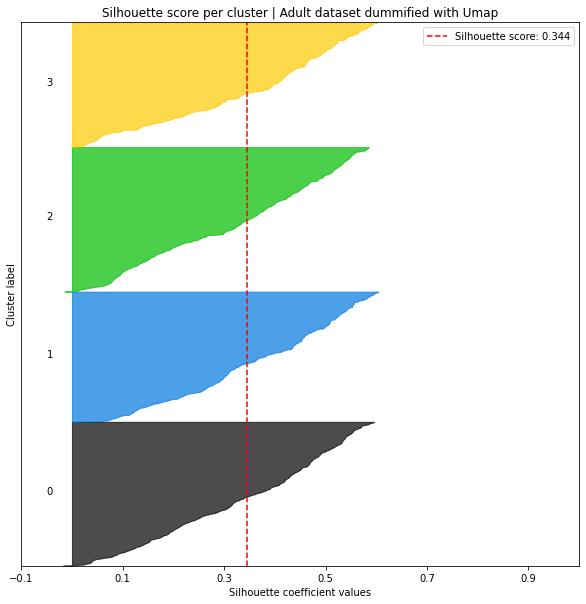

In [ ]:
# We're going to try to get our 4 clusters
kmeans_adult_umap = KMeans(n_clusters=4, random_state=42)

kmeans_adult_umap.fit(embedding)

skplt.metrics.plot_silhouette(embedding,
                                kmeans_adult_umap.labels_,
                                title='Silhouette score per cluster | Adult dataset dummified with Umap',
                                figsize=(12,8))
plt.show()

#### Conclusions:
0. Nice __alternative__ to PCA or SVD, there no silver bullet! use with caution!
1. When you have many instances (more than 100.000 in my experience) It might not be suitable in __compute time terms.__


## Interpretation of clusters with Skope Rules

Interpretability It's perhaps the philospher's stone in machine learning. We all want to __understand, validate and extract knowledge__ from these(sometimes) almost eery precise algorithms. The thing is perhaps more needed when you don't have labels and have good metrics implying that _the algorithm has discovered things_ that you can't corroborate with a ground truth.

So, here we are, getting (aparently) awesome results and needing to distill them to human/business lenguage. One alternative It's comparing the statistics from each cluster and try to get insights from there. Another one is recurring to [Skope Rules](https://github.com/scikit-learn-contrib/skope-rules) and rock the hell out of those insights. 👨‍💻

The main idea is create a 1 vs all class concept for each cluster (i.e.: cluster n It's our first candidate, so we make all It's instances our positive class and assign the negative one to all the others) and then learn rules to split these classes with a classifier. All these steps are inscribing this technique as a _surrogate model_ interpretability one, meaning that we're creating a model over the results of another one but this new model has some degree of interpretability. Specifically this library shines because It delivers rules that are easily interpretable by humans.

There's some fine tuning over the process of creating rules that we're not gonna cover, read the docs! 🧬

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from skrules import SkopeRules
from sklearn.model_selection import train_test_split

Buckle up! It's a long loop

Cluster 0:
x > 394.18170166015625 and y <= 336.0565185546875
Precision 1.00


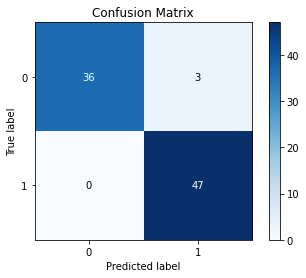

Cluster 1:
x <= 370.08984375 and y > 274.6092987060547
Precision 1.00


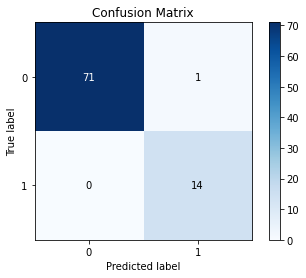

Cluster 2:
x <= 400.8885955810547 and y <= 273.58441162109375
Precision 1.00


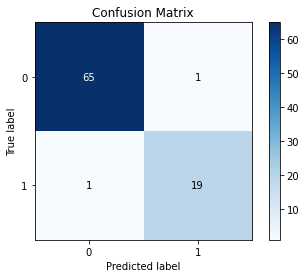

Cluster 3:
x > 393.2020568847656 and y > 413.2594451904297
Precision 1.00


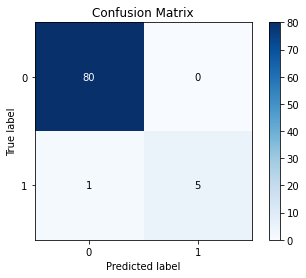

In [ ]:

for i_cluster in range(4): # As we said, one classifier for each cluster
    X = drawn_data[['x', 'y']] # The data
    y = (cool_kmeans.labels_==i_cluster)*1 # The labels that we're going to use
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify= y)  # We split the data stratified by the cluster and we could even cross validate but not today
    
    skope_rules_clf = SkopeRules(feature_names=drawn_data[['x', 'y']].columns, # To get the rule in understable terms we could rename them but not today
                                    random_state=42)

    skope_rules_clf.fit(X_train, y_train) # We fit the rules creator
    
    print('Cluster '+str(i_cluster)+':') # To order results we're printing a "header"
    
    print(skope_rules_clf.rules_[0][0]) # The data structure It's a little messy to just print it so we're accesing the first rule here
    
    print('Precision {:.2f}'.format(skope_rules_clf.rules_[0][1][0])) # And here we're accesing the Precision for the first rule
    
    skplt.metrics.plot_confusion_matrix(y_test, skope_rules_clf.predict(X_test)) # Look who's back! Scikit plot!

    plt.show()

#### Conclusions:
0. Simplifies in an elegant way (the 1 vs all class classification with trees) a complex analysis
1. It might show better results with some tuning, It's important to keep in mind the __human/business sense of these rules__ (are they relevant? do they make sense?)
2. It's __not totally ready for non-technical users__ because you should interpret the precision and recall regarding each rule


## For times when the dataset keeps growing and your resources stay the same you call Faiss 🧪

There's a decent chance that at some point you run a cluster over a gigantic dataset for the hardware available. Even considering the speed of Kmeans (It's FAST, without a doubt) you'll be waiting from minutes to hours to get a result. As you probably know the speed It's not about saving time just because we want to, It's mainly based on the premise that running multiple experiments It's good for the final model. If you try 50 diferents approaches you'll have more chances of nailling it than trying just 1 of them and hope for the best.

So if you are with a massive but not as massive dataset that you need big data guns you really should give it a shot with [Faiss](https://github.com/facebookresearch/faiss). This library has many tricks to be increible fast computing so even with the CPU version shows a dramatic improvement over the times of Kmeans, picture it with GPU!!

We're running a small experiment ⏱ to test the time and results in the same dataset. You'll see that we don't compute Silhouette for the entire datast but for a sample, this is because Silhouette it's expensive so we'll trust these results. Also we'll be using Adjusted mutual information score, a metric that evaluates the overlaping of instances in the labels. This metric It's zero when the groups do not overlap at all and It's one when the labeling It's correct. An important point It's that the labels can be named different (for example in our drawn data we had clusters with letters and kmeans returns numbers), so we can check the similarity in the labels generated by each algorithm.

### 2nd bonus: Dockerfile to run Faiss-CPU in Deepnote
Okay, now we're going to make yet another proper use of Deepnote's features and we'll use a Dockerfile to install Anaconda (needed to proper install Faiss). A Dockerfile allows you to use a totally diferent environment and It's really usefull to ensure that libraries and dependencies are properly installed and that they won't raise errors (well, that's wishful thinking perhaps) when you have a productive model.

To change the Dockerfile you just need the Dockerfile or the code and then just set the options to aim to the file. Just look the gif:
![alt text](/pics/Dockerfile.gif)

In [ ]:
import faiss
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.cluster import KMeans

In [ ]:
# This is to solve a semi-bug that slow Faiss down in a dramatic way, you can read more in https://github.com/facebookresearch/faiss/issues/53
!OMP_WAIT_POLICY=PASSIVE

In [ ]:
class FaissKMeans:
    def __init__(self, n_clusters=4, n_init=1000, max_iter=300, random_state=42):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.seed = random_state
        self.kmeans = None
        self.cluster_centers_ = None
        self.inertia_ = None

    def fit(self, X):
        self.kmeans = faiss.Kmeans(d=X.shape[1],
                                   k=self.n_clusters,
                                   niter=self.max_iter,
                                   nredo=self.n_init,
                                   seed=self.seed)
        self.kmeans.train(X.astype(np.float32))
        self.cluster_centers_ = self.kmeans.centroids
        self.inertia_ = self.kmeans.obj[-1]
        self.labels_ = self.kmeans.index.search(X.astype(np.float32), 1)[1].reshape(-1,)

    def predict(self, X):
        return self.kmeans.index.search(X.astype(np.float32), 1)[1]

In [ ]:
X, y = make_blobs(n_samples=2000000, centers=8, n_features=30,
                  random_state=42)

In [ ]:
%%time
ff = FaissKMeans()
ff.fit(X)

CPU times: user 1min 9s, sys: 468 ms, total: 1min 9s
Wall time: 47 s


In [ ]:
%%time
print('Silhouette Score with 40.000 samples: {:.3f}'.format(silhouette_score(X, ff.labels_, sample_size=40000, random_state=42)))
print('Adjusted Mutual Information Score: {:.3f}'.format(adjusted_mutual_info_score(ff.labels_, y)))

Silhouette Score with 40.000 samples: 0.456
Adjusted Mutual Information Score: 0.737
CPU times: user 15.9 s, sys: 2.34 s, total: 18.2 s
Wall time: 18.2 s


In [ ]:
%%time
km = KMeans(random_state=42, n_clusters=4, n_init=1000, max_iter=300)
km.fit(X)

CPU times: user 31min 46s, sys: 1min 22s, total: 33min 8s
Wall time: 26min 37s


KMeans(n_clusters=4, n_init=1000, random_state=42)

In [ ]:
%%time
print('Silhouette Score with 40.000 samples: {:.3f}'.format(silhouette_score(X, km.labels_, sample_size=40000, random_state=42)))
print('Adjusted Mutual Information Score: {:.3f}'.format(adjusted_mutual_info_score(km.labels_, y)))

Silhouette Score with 40.000 samples: 0.456
Adjusted Mutual Information Score: 0.737
CPU times: user 15.7 s, sys: 2.38 s, total: 18.1 s
Wall time: 18.1 s


Ok, so now we know that both algorithms deliver the same results in two metrics but we can check if the _labeling_ is exactly the same:

In [ ]:
print('Adjusted Mutual Information Score: {:.3f}'.format(adjusted_mutual_info_score(km.labels_, ff.labels_)))

Adjusted Mutual Information Score: 1.000


Wow!! Now all the trouble installing Faiss makes sense!! It works exactly like we expected, playing and winning the clustering game to Kmeans itself.

#### Conclusions:
0. It's __truly faster__ running in the same hardware which is impressive (check the time!! 🥇 1 minute vs 31 to get the same labelling)
1. The installation process was painfull for me, perhaps I'm not good dealing with these kind of problem but either way __It's not as simple as most libraries.__
2. Without the referenced closed issue I wouldn't be able to run It properly, __kudos to the community!__

## Demo-ing a webpage with Streamlit directly from Deepnote
So at this point we've made some preprocessing, ran some (many!) experiments and compare their results, perhaps even you uncovered some meaninful insights and characterized each cluster. Now's the time to showcase the final result to the world! You only need to show a demo that impress even the most skeptical decision maker.

Well, sometimes showing a notebook (even a pretty one) is not the best option as It's rather difficult to imagine what you're seeing in another place (to a CRM, webpage, anywhere!). For those cases you can make a small demo in [Streamlit](https://streamlit.io/) and when you're working in a cloud notebook add some [Ngrok](https://ngrok.com/docs) to get the deal done. Full disclosure this code is the result of reading [this](https://community.deepnote.com/c/ask-anything/using-streamlit-in-deepnote) question and re-using the code. Kudos to the Deepnote community!

In [ ]:
# We download Ngrok, check how It appears in the files!
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2021-04-26 00:16:26--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.225.127.47, 52.200.34.95, 54.236.206.131, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.225.127.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13828408 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.2’

ngrok-stable-linux- 100%[===================>]  13.19M  56.7MB/s    in 0.2s    

2021-04-26 00:16:26 (56.7 MB/s) - ‘ngrok-stable-linux-amd64.zip.2’ saved [13828408/13828408]



In [7]:
# Then unzip It
!unzip -y ngrok-stable-linux-amd64.zip 

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use escapes for all non-ASCII Unicode  -UU ignore any Unicode fields
  -C  mat

In [8]:
import pickle # To serialize our model
import pandas as pd # ...
from sklearn.cluster import KMeans # It won't miss a section for nothing in the world

This is our demo model, truly lean :P

In [9]:
dataset = pd.read_csv('data.csv') # We read the drawn data

km = KMeans(n_clusters = 4, random_state=42) # Let's cluster as It is
km.fit(dataset[['x', 'y']]) # Fitting to the data

pickle.dump(km, open('model.pkl','wb')) # We save the model (check the list of files!)

So, in order to show an app Streamlit ask that you create a .py file instead of running cells from a notebook. We can easily do this creating a file named _cluster_app.py_ and editing it or looking at the _magic_ 🧙‍♂️ below. Remember there are thousands of streamlit apps running around, take a look in their gallery or search in Github for examples to copy and edit.
```
import streamlit as st # We list every library that we must import
import seaborn as sns
import pandas as pd
import pickle
import matplotlib.pyplot as plt

dataset = pd.read_csv('data.csv') # For what I have in mind I'll need the data
model = pickle.load(open('model.pkl', 'rb')) # We load the trained model

st.write("""
# Let's cluster some numbers 😎 
""") # This is the main title (check the image!)

st.sidebar.header("User input's") # This is the sidebar title

def user_input_features(): # We define functions to read the user inputs over the streamlit sliders controls and return them as a pandas dataframe
    x_ = st.sidebar.slider('x value', 1, 1000, int(dataset['x'].mean())) # We establish the range 1-1000 for the inputs and set the default in the mean of the value in the train set
    y_ = st.sidebar.slider('y value', 1, 1000, int(dataset['y'].mean())) # Same as above!
    data = {'y': y_,
            'x': x_,
            'data_type': 'prediction'}
            
    features = pd.DataFrame(data, index=[0])
    return features


df = user_input_features() # We retrieve the input using the function defined above and save it as "df"

st.subheader('Your x & y values:') # This is the title of the next print (the df)

st.write(df) # We print the data just to show the selected values in case the user closes the sidebar


cluster_n = model.predict(df[['x', 'y']]) # We are saving the predicted label for the user input, you'll see why!


temp_df = pd.concat([dataset[['x', 'y']], df], axis= 0) # Now we put the input and the train dataset together
temp_df['cluster'] = model.predict(temp_df[['x', 'y']]) # Add a column named 'cluster'
temp_df.fillna('train', inplace=True) # This is to fill the "data_type" field and distinguish between training and user input instances

st.subheader('# of cluster') # Just a title

st.write(cluster_n ) # Now we do use the predicted cluster of the input we stored before

st.write(temp_df) # We print the full dataset (check the interactivity, neat!)

st.title("Scatterplot") # Now we add a title for the scatterplot

fig, ax = plt.subplots() # First define the scatterplot
ax =sns.scatterplot(data=temp_df,
                    x="x",
                    y="y",
                    hue="cluster", # Color by cluster
                    style="data_type", # To drawn different shapes
                    size='data_type', # We're going to set some difference in the size also
                    sizes={'prediction': 100, # You can just state the sizes in a dictionary
                            'train': 20})

ax.legend(bbox_to_anchor=(1, 1), # This is to move the legends outside the plot
           borderaxespad=1)

st.pyplot(fig) # Finally, we render this scatterplot in streamlit 

Check the GIF if you have doubts! ![alt text](/pics/streamlit.gif)

In [19]:
%%writefile cluster_app.py 
# With this magic you'll save the content of the cell into a file named "cluster_app.py"

import streamlit as st # We list every library that we must import
import seaborn as sns
import pandas as pd
import pickle
import matplotlib.pyplot as plt

dataset = pd.read_csv('data.csv') # For what I have in mind I'll need the data
model = pickle.load(open('model.pkl', 'rb')) # We load the trained model

st.write("""
# Let's cluster some numbers 😎 
""") # This is the main title (check the image!)

st.sidebar.header("User input's") # This is the sidebar title

def user_input_features(): # We define functions to read the user inputs over the streamlit sliders controls and return them as a pandas dataframe
    x_ = st.sidebar.slider('x value', 1, 1000, int(dataset['x'].mean())) # We establish the range 1-1000 for the inputs and set the default in the mean of the value in the train set
    y_ = st.sidebar.slider('y value', 1, 1000, int(dataset['y'].mean())) # Same as above!
    data = {'y': y_,
            'x': x_,
            'data_type': 'prediction'}
            
    features = pd.DataFrame(data, index=[0])
    return features


df = user_input_features() # We retrieve the input using the function defined above and save it as "df"

st.subheader('Your x & y values:') # This is the title of the next print (the df)

st.write(df) # We print the data just to show the selected values in case the user closes the sidebar


cluster_n = model.predict(df[['x', 'y']]) # We are saving the predicted label for the user input, you'll see why!


temp_df = pd.concat([dataset[['x', 'y']], df], axis= 0) # Now we put the input and the train dataset together
temp_df['cluster'] = model.predict(temp_df[['x', 'y']]) # Add a column named 'cluster'
temp_df.fillna('train', inplace=True) # This is to fill the "data_type" field and distinguish between training and user input instances

st.subheader('# of cluster') # Just a title

st.write(cluster_n ) # Now we do use the predicted cluster of the input we stored before

st.write(temp_df) # We print the full dataset (check the interactivity, neat!)

st.title("Scatterplot") # Now we add a title for the scatterplot

fig, ax = plt.subplots() # First define the scatterplot
ax =sns.scatterplot(data=temp_df,
                    x="x",
                    y="y",
                    hue="cluster", # Color by cluster
                    style="data_type", # To drawn different shapes
                    size='data_type', # We're going to set some difference in the size also
                    sizes={'prediction': 100, # You can just state the sizes in a dictionary
                            'train': 20})

ax.legend(bbox_to_anchor=(1, 1), # This is to move the legends outside the plot
           borderaxespad=1)

st.pyplot(fig) # Finally, we render this scatterplot in streamlit 

Overwriting cluster_app.py


In [20]:
get_ipython().system_raw('./ngrok http 8501 &') # This is the magic that makes posible to run a localhost in a cloud instance

!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print(json.load(sys.stdin)["tunnels"][0]["public_url"])'

!streamlit run cluster_app.py

https://98c259af2de4.ngrok.io

  You can now view your Streamlit app in your browser.

  Network URL: http://172.3.37.56:8501
  External URL: http://34.227.172.158:8501

^C
  Stopping...


#### Conclusions:
0. Every model deserves a chance of being properly show
1. With little coding you can show something really cool and professional, just look until you find a nice template!
2. Without sharing there's no chance of improvement, that's why I'm here!

# Final thoughs

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4f5efaa1-5bc4-4195-979e-865992eb0408' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>